<h1>Analizando algoritmos de ordenamiento</h1>

In [189]:
import math
import numpy as np
import pylab as pl
%matplotlib inline

<h2>Problema de ordenamiento</h2>

Input:  $A[1..n] = <a_1,a_2\ldots, a_n>$

Output: $A'[1..n] = <a'_1,a'_2\ldots, a'_n> : a'_1\leq a'_2 \leq \ldots \leq  a'_n$

<h3> Ordenamiento por inserción </h3>

In [190]:
def insertion_sort(A):
    j = 1
    while j < len(A):
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1
        A[i + 1] = key
        j = j + 1

In [191]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[1 3 5 6 7 0 2 4 8 9]
[0 1 2 3 4 5 6 7 8 9]


<h4>Correctitud</h4>

<b>Invariante:</b> Al comienzo de cada iteración del ciclo externo el subarreglo $A[0..j-1]$ consiste de los elementos originalmente en $A[0..j-1]$ pero ordenados.

In [192]:
def invariant(A, original_A):
    l1 = list(A)
    l2 = list(original_A)
    l2.sort()
    return l1 == l2

In [193]:
print invariant([1, 2, 3, 4], [4, 3, 2, 1])
print invariant([1, 2, 3, 4], [5, 3, 2, 1])

True
False


Algoritmo de ordenamiento por inserción incluyendo evaluación de la invariante (inicialización, mantenimiento, terminación)

In [194]:
def right_insertion_sort(A):
    original_A = list(A)
    j = 1
    assert invariant(A[0:j], original_A[0:j])
    while j < len(A):
        assert invariant(A[0:j], original_A[0:j])
        key = A[j]
        i = j - 1
        while (i >= 0) and (A[i] > key):
            A[i + 1] = A[i]
            i = i -1        
        A[i + 1] = key
        j = j + 1
    assert invariant(A[0:j], original_A[0:j])

In [195]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
right_insertion_sort(B)
print B

[1, 2, 3, 4, 5, 6, 7, 8, 9]


La siguiente función incluye un error, por lo tanto la aserción para comprobar el invariante de ciclo falla. Esto genera una excepción que es capturada para imprimir un mensaje y el estado de las variables.

In [196]:
def wrong_insertion_sort(A):
    original_A = list(A)
    j = 1
    try:
        assert invariant(A[0:j], original_A[0:j])
        while j < len(A):
            assert invariant(A[0:j], original_A[0:j])
            key = A[j]
            i = j - 1
            while (i >= 0) and (A[i] < key):
                A[i + 1] = A[i]
                i = i - 1        
            A[i + 1] = key
            j = j + 1
        assert invariant(A[0:j], original_A[0:j])
    except  AssertionError:
        print "Error en el invariante de ciclo!"
        print "j=", j
        print "i=", i
        print "A=", A
        print "Original A=", original_A

In [197]:
B = [5, 4, 6, 3, 7, 2, 8, 1, 9]
wrong_insertion_sort(B)

Error en el invariante de ciclo!
j= 2
i= 0
A= [5, 4, 6, 3, 7, 2, 8, 1, 9]
Original A= [5, 4, 6, 3, 7, 2, 8, 1, 9]


<h4> Análisis del tiempo de ejecución</h4>

In [198]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def acct_insertion_sort(A, acct):
    j = 1; acct.count()
    acct.count()
    while j < len(A):
        acct.count()
        key = A[j]; acct.count()
        i = j - 1; acct.count()
        acct.count()
        while (i >= 0) and (A[i] > key):
            acct.count()
            A[i + 1] = A[i]; acct.count()
            i = i -1; acct.count()
        A[i + 1] = key; acct.count()
        j = j + 1; acct.count()

In [199]:
B = np.random.permutation(range(0,10))
acct = Counter()
acct_insertion_sort(B, acct)
acct.print_steps()

Number of steps = 122


<h4>Análisis experimental</h4>
Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_insertion_sort(l, acct) y contabiliza el número de pasos.

In [200]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        acct.reset()
        acct_insertion_sort(l, acct)
        results.append(acct.steps)
    return results

In [201]:
print exper_analysis(10)

[2, 2, 8, 17, 26, 32, 68, 65, 98, 128]


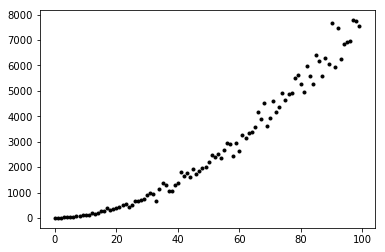

In [202]:
pl.clf()
x = np.arange(100)
y = np.array(exper_analysis(100))
pl.plot(x, y, 'k.')

#Actividad
 <ol>
  <li>En una sola gráfica represente el número de operaciones, tiempo y T(n) que el algoritmo de ordenamiento por inserción requiere para ordenar arreglos de tamaño n (varie n) en el peor de los casos.</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento por mezclas (merge sort)</li>
  <li>Replique los ejercicios realizados en este taller para el algoritmo de ordenamiento quick-sort</li>
</ol> 

# Punto 1: Insertion Sort


Analisis para el tiempo de ejecucion:

In [203]:
import time
import random as rnd

def tiempoEjecucion(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        tic = time.clock()
        right_insertion_sort(l)
        toc = time.clock()
        results.append((toc-tic)*100000000)
    return results

In [204]:
print tiempoEjecucion(10)

[631.6107828752138, 315.8053004881367, 513.1836587679572, 592.1350748394616, 710.5620170477778, 868.4648491907865, 1026.3673175359145, 1223.745675815735, 1302.6970918872394, 1618.502392375376]


Analisis para el tiempo teorico:

In [205]:
import time

def tiempoTeorico(n):
    results = []
    acct = Counter()
    for i in range(n):
        l = range(i)
        rnd.shuffle(l)
        #tiempo inicial de ejecucion
        tic = time.clock()
        #Llamado al algoritmo
        right_insertion_sort(l)
        #Tiempo final de ejecucion
        toc = time.clock()
        results.append((toc-tic)*100000000)
        
    return results

In [206]:
print tiempoTeorico(10)

[710.5620170477778, 355.2810085238889, 552.6593668037094, 631.6107828752138, 710.5620170477778, 868.4646672918461, 1026.3673175359145, 1263.2213838514872, 1342.1727999229915, 1618.502392375376]


# Grafica: Numero de operaciones, tiempo de ejecucion y tiempo teorico

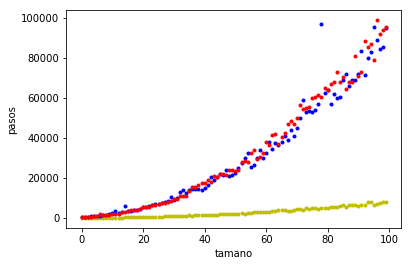

In [207]:
pl.clf()
xname = pl.xlabel('tamano')
yname = pl.ylabel('pasos')
x = np.arange(100)
#Numero de operaciones 
y = np.array(exper_analysis(100)) 
pl.plot(x, y, 'k.', color ='y')
#Tiempo de ejecucion 
z = np.array(tiempoEjecucion(100))
pl.plot(x, z, 'k.', color='b')
#Tiempo teorico
w = np.array(tiempoTeorico(100))
pl.plot(x, w, 'k.', color='r')

# Punto 2: Merge Sort

Algoritmo Merge Sort:

In [208]:
#Tomado de http://interactivepython.org/courselib/static/pythonds/SortSearch/TheMergeSort.html
def mergeSort(alist):
    
      if len(alist)>1:
            
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]

        mergeSort(lefthalf)
        mergeSort(righthalf)

        i=0
        j=0
        k=0
        
        while i < len(lefthalf) and j < len(righthalf):
           
            if lefthalf[i] < righthalf[j]:
                
                alist[k]=lefthalf[i]
                i=i+1
                
            else:
                alist[k]=righthalf[j]
                j+=1
            k=k+1

        while i < len(lefthalf):
            
            alist[k]=lefthalf[i]
            i+=1
            k+=1

        while j < len(righthalf):
            
            alist[k]=righthalf[j]
            j+=1
            k+=1
    


In [209]:
B = np.random.permutation(range(0,10))
print B
insertion_sort(B)
print B

[9 7 6 4 2 0 5 8 1 3]
[0 1 2 3 4 5 6 7 8 9]


# Correctitud

Invariante: Al final de cada llamado a la función, el subarreglo se compone de los elementos originales pero ordenados.

In [210]:
def invariante(A, inicial_A):
       
    inicial_A.sort()
    
    print A == inicial_A
    return A == inicial_A



In [211]:
print invariante([1, 2, 3, 4], [4, 3, 2, 1])
print invariante([1, 2, 3, 4], [6, 7, 8, 9])

True
True
False
False


# Evaluación de la invariante

Merge Sort evaluando la invariante en fase de inicialización, mantenimiento y terminación.

In [212]:
def right_mergeSort(alist):
    inicial_A = list(alist)
    try:
        if len(alist)>1:
            mid = len(alist)//2
            mitadIzquierda = alist[:mid]
            mitadDerecha = alist[mid:]
            
            right_mergeSort(mitadIzquierda)
            right_mergeSort(mitadDerecha)
            
            i=0
            j=0
            k=0
            
            while i < len(mitadIzquierda) and j < len(mitadDerecha):
                
                if mitadIzquierda[i] <= mitadDerecha[j]:
                    alist[k]=mitadIzquierda[i]
                    i+=1
                else:
                    alist[k]=mitadDerecha[j]
                    j+=1
                k=k+1

            while i < len(mitadIzquierda):
                alist[k]=mitadIzquierda[i]
                i+=1
                k+=1

            while j < len(mitadDerecha):
                alist[k]=mitadDerecha[j]
                j+=1
                k+=1
                
            assert invariante(alist,inicial_A)
            
    except  AssertionError:
        
        print "Error en el invariante de ciclo!"
        print "Original A=", inicial_A
        print "otro", mitadIzquierda+mitadDerecha

In [213]:
B = [6, 2, 3, 1, 8, 4, 5, 7, 9]
C = list(B)

print C
right_mergeSort(C)

print C

[6, 2, 3, 1, 8, 4, 5, 7, 9]
True
True
True
True
True
True
True
True
[1, 2, 3, 4, 5, 6, 7, 8, 9]


# Análisis: tiempo de ejecución

In [214]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps
        
def merge_Sort(alist, acct):
    
    if len(alist)>1:
        
        acct.count()
        mid = len(alist)//2;acct.count()
        
        mitadIzquierda = alist[:mid];acct.count()
        mitadDerecha = alist[mid:];acct.count()

        merge_Sort(mitadIzquierda,acct);acct.count()
        merge_Sort(mitadDerecha,acct);acct.count()

        i=0;acct.count()
        j=0;acct.count()
        k=0;acct.count()
        
        while i < len(mitadIzquierda) and j < len(mitadDerecha):
            acct.count()
            
            if mitadIzquierda[i] <= mitadDerecha[j]:
                
                acct.count()
                alist[k]=mitadIzquierda[i];acct.count()
                i+=1;acct.count()
                
            else:
                acct.count()
                alist[k]=mitadDerecha[j];acct.count()
                j+=1;acct.count()
            k+=1;acct.count()
        acct.count()
        
        while i < len(mitadIzquierda):
            
            acct.count()
            alist[k]=mitadIzquierda[i];acct.count()
            i+=1;acct.count()
            k+=1;acct.count()
        acct.count()
        
        while j < len(mitadDerecha):
            
            acct.count()
            alist[k]=mitadDerecha[j];acct.count()
            
            j+=1;acct.count()
            k+=1;acct.count()
            
        acct.count()
        
    acct.count()

In [215]:
B = [8,15,9,6,4,7,8,2,3,23]
C = list(B)

print C

acct = Counter()
merge_Sort(C, acct)
acct.print_steps()

[8, 15, 9, 6, 4, 7, 8, 2, 3, 23]
Number of steps = 287


# Análisis experimental

In [216]:
import random as rnd

def exper_analysis(n):
    
    results = []
    acct = Counter()
    
    for j in range(n):
        
        l = range(j)
        rnd.shuffle(l)
        C =list(l)
        acct.reset()
        merge_Sort(l, acct)
        results.append(acct.steps)
        
    return results

In [217]:
print exper_analysis(10)

[1, 1, 24, 52, 80, 112, 143, 179, 211, 249]


# Análisis Teórico

In [218]:
import math
import random as rnd

def analisisTeorico(n):
    
    results = []
    for i in range(n):
        
        if(i == 0):
            l = 0
        else:
            l = i*np.log2(i)
        results.append(l)
        
    return results

In [219]:

print analisisTeorico(10)

[0, 0.0, 2.0, 4.7548875021634682, 8.0, 11.60964047443681, 15.509775004326936, 19.651484454403228, 24.0, 28.529325012980809]


# Análisis tiempo de ejecución

In [220]:
import time
import random

tic = time.clock()
toc = time.clock()

def tiempoEjecucion(n):
    
    results = []
    acct = Counter()
    
    for i in range(n):
        
        l = list(range(i))
        random.shuffle(l)
        acct.reset()
        tic = time.clock()
        merge_Sort(l,acct)
        toc = time.clock()
        results.append((toc-tic))
        
    return results

In [221]:
print tiempoEjecucion(10)

[3.947567165596411e-06, 3.9475708035752177e-07, 7.895134331192821e-06, 1.4211240340955555e-05, 2.1316860511433333e-05, 3.0001509003341198e-05, 3.7501884435187094e-05, 4.5397018766379915e-05, 6.829290578025393e-05, 6.39505815343e-05]


# Grafica: Numero de operaciones, tiempo de ejecucion y tiempo teorico

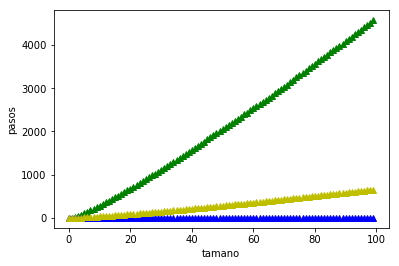

In [222]:
pl.clf()
xname = pl.xlabel('tamano')
yname = pl.ylabel('pasos')
x = np.arange(100)
#Numero de operaciones 
y = np.array(exper_analysis(100)) 
pl.plot(x, y, 'g^', color ='g')
#Tiempo de ejecucion 
z = np.array(tiempoEjecucion(100))
pl.plot(x, z, 'g^', color='b')
#Tiempo teorico
w = np.array(analisisTeorico(100))
pl.plot(x, w, 'g^', color='y')

# Punto 3: Algoritmo Quick Sort

Algoritmo Quick Sort

In [223]:
#Algoritmo tomado de https://www.genbetadev.com/algoritmos/implementando-el-algoritmo-quicksort

def quicksort(L, first, last):
    # definimos los índices y calculamos el pivote
    i = first
    j = last    
    pivote = (L[i] + L[j]) / 2

    # iteramos hasta que i no sea menor que j
    while i < j:
        # iteramos mientras que el valor de L[i] sea menor que pivote
        while L[i] < pivote:
            # Incrementamos el índice
            i+=1
        # iteramos mientras que el valor de L[j] sea mayor que pivote
        while L[j] > pivote:
            # decrementamos el índice
            j-=1
        # si i es menor o igual que j significa que los índices se han cruzado
        if i <= j:
            # creamos una variable temporal para guardar el valor de L[j]
            x = L[j]
            # intercambiamos los valores de L[j] y L[i]
            L[j] = L[i]
            L[i] = x
            # incrementamos y decrementamos i y j respectivamente
            i+=1
            j-=1
            
    # si first es menor que j mantenemos la recursividad
    if first < j:
        L = quicksort(L, first, j)
    # si last es mayor que i mantenemos la recursividad
    if last > i:
        L = quicksort(L, i, last)

    # devolvemos la lista ordenada
    return L


In [224]:
B = [1,3,4,2,9,5,6,8,10]
C = list(B)

print C
quicksort(C,1,8)

print C

[1, 3, 4, 2, 9, 5, 6, 8, 10]
[1, 2, 3, 4, 5, 6, 8, 9, 10]


# Correctitud


Invariante: a partir de un pivote p en el arreglo, se deben cumplir 2 condiciones:
* Los números que estén a la izquierda del pivote deben ser menores que este. 
* Los números que estén a la derecha pivote deben ser mayores que este.

In [225]:
def invarianteQS(A, pivote):
    i=0
    j=pivote+1
    if j < len(A):
        while j < len(A):
            if A[pivote] < A[j]:
                j = j + 1
            else:
                return False;
    else:
        if pivote != 0:
            while i>0:
                if A[pivote] > A[i]:
                    i = i - 1
                else:
                    return False
    return True

In [226]:
print (invarianteQS([3,4,5,6,7],3))
print (invarianteQS([3,9,11,23,36],3))

print (invarianteQS([23,65,98,56,69],2))


True
True
False


# Evaluación de la invariante


Quick Sort y la evaluación de su invariante (inicialización, mantenimiento, terminación)

In [227]:
def right_quicksort (P,primero,ultimo):
    
    try:
        
        i = primero
        j = ultimo    
        pivote = int((P[i] + P[j]) / 2)

        while i < j:
            
            while P[i] < pivote:
                i+=1
                
            while P[j] > pivote:
                j-=1
                
            if i <= j:
                x = P[j]
                P[j] = P[i]
                P[i] = x
                i+=1
                j-=1
                
        assert invarianteQS(P,pivote)
            
        if primero < j:
            right_quicksort(P, primero, j)

        if ultimo > i:
             right_quicksort(P, i, ultimo)
                
        assert invarianteQS(P,pivote)
        
    except  AssertionError:
        
        print ("Ordenado")

In [228]:
P = [9,5,6,89,23,1,22]
x = len(P)-1
right_quicksort(P,0,x)
print (P)

Ordenado
[1, 5, 6, 9, 22, 23, 89]


# Análisis: tiempo de ejecución

In [229]:
class Counter:
    '''
    Class Counter
    Implements a step counter, which is used to compute the number of basic operations performed in
    a particular call to a function.
    '''
    def __init__(self):
        self.steps = 0

    def reset(self):
        self.steps = 0

    def count(self):
        self.steps += 1

    def print_steps(self):
        print "Number of steps =", self.steps

        
def acct_quicksort(L, first, last, acct):
    # definimos los índices y calculamos el pivote
    i = first;acct.count()
    j = last;acct.count()     
    pivote = (L[i] + L[j]) / 2;acct.count()

    # iteramos hasta que i no sea menor que j
    while i < j:
        acct.count()
        # iteramos mientras que el valor de L[i] sea menor que pivote
        while L[i] < pivote:
            acct.count()
            # Incrementamos el índice
            i+=1;acct.count()
        # iteramos mientras que el valor de L[j] sea mayor que pivote
        while L[j] > pivote:
            # decrementamos el índice
            acct.count()
            j-=1;acct.count()
        if i <= j:
            acct.count()
            x = L[j];acct.count()
            L[j] = L[i];acct.count()
            L[i] = x;acct.count()
            i+=1;acct.count()
            j-=1;acct.count()
    # si first es menor que j mantenemos la recursividad 
    if first < j:    
        acct.count()
        L = acct_quicksort(L, first, j,acct);acct.count()
    # si last es mayor que i mantenemos la recursividad
    if last > i:
        acct.count()
        L = acct_quicksort(L, i, last,acct);acct.count()
    # lista ordenada
    return L

In [230]:
B = np.random.permutation(range(0,10))
C = list(B)
print C
acct = Counter()
x=len(C)-1
acct_quicksort(C,0,x, acct)
acct.print_steps()


[2, 8, 3, 9, 4, 6, 1, 7, 0, 5]
Number of steps = 142


# Análisis experimental

Ahora vamos a analizar el comportamiento del algoritmo cuando el tamaño de la entrada varía. La siguiente función genera arreglos al azar de tamaño 1 a n, llama la función acct_quicksort(L, first, last, acct) y contabiliza el número de pasos.

In [231]:
import random as rnd

def exper_analysis(n):
    results = []
    acct = Counter()
    
    for i in range(n):
        l=0
        
        if i>0 :
            l = range(i)
            rnd.shuffle(l)
            C =list(l)
            acct.reset()
            
            x=len(C)-1
            acct_quicksort(C,0,x, acct)
            
        results.append(acct.steps)
        
    return results

In [232]:
print exper_analysis(10)

[0, 3, 10, 14, 42, 68, 80, 114, 112, 125]


# Análisis teórico

In [233]:
def analisisTeorico(n):
    
    results = []
    acct = Counter()
    
    for i in range(n):
        l=0
        
        if i > 1:
            l = i * i
            
        results.append(l)
        
    return results

In [234]:
print analisisTeorico (10)

[0, 0, 4, 9, 16, 25, 36, 49, 64, 81]


# Análisis tiempo de ejecución

In [235]:
import random as rnd
import time

def tiempoEjecucion(n):
    results = []
    
    for i in range(n):
        rel = 0
        
        if i > 0 :
            l = range(i)
            rnd.shuffle(l)
            C =list(l)
            tic = time.clock()
            x=len(C)-1
            quicksort(C,0,x)
            toc = time.clock()
            rel = (toc-tic)*100000000
        results.append(rel)
    return results

In [236]:
print tiempoEjecucion(10)

[0, 236.8540663155727, 157.90265024406835, 1263.2213838514872, 236.8540663155727, 394.75671655964106, 552.6593668037094, 789.5134331192821, 750.03772508353, 750.03772508353]


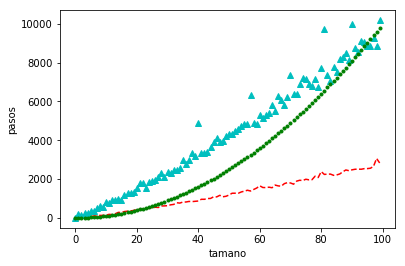

In [237]:
pl.clf()
xname = pl.xlabel('tamano')
yname = pl.ylabel('pasos')
x = np.arange(100)
#Numero de operaciones 
y = np.array(exper_analysis(100)) 
pl.plot(x, y, 'r--', color ='r')
#Tiempo de ejecucion 
z = np.array(tiempoEjecucion(100))
pl.plot(x, z, 'g^', color='c')
#Tiempo teorico
w = np.array(analisisTeorico(100))
pl.plot(x, w, '.k', color='g')